<h3><b>Introduction to Data Analytics - Exercise set 2 - pandas-module</b></h3>

Put all your exercises (Jupyter Notebooks or Python-files) in your course Git-project.
Use either code comments or Jupyter Notebook markdown (text) to document which exercise you are doing and what a certain code section does! 
You can return all of these exercises in a single Jupyter Notebook, if you wish.

<b>The datasets for these exercises have been collected from kaggle.com<br />
(a service providing different datasets for practice)</b>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_1.png" />

<h4><b>1. import pandas and read the csv-file found in Moodle (loans.csv). Use Python coding with pandas to answer the questions.</b></h4>


In [93]:
# you can import numpy and pandas here
# and also load the needed csv-file
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import zscore

# Load the data 
df= pd.read_csv('Datasets\loans.csv')

<li>Remove the Customer ID –column from data</li>
<li>Print the head of the data</li>

In [94]:
# Removing the customer id  from the dataset
df = df.drop('Customer ID', axis=1)

<ul>
    <li>Remove rows from the data that have <b style="color: red;">a too large of a loan</b> (Current Loan Amount should be less than 99999999)</li>
    <ul>
        <li><b>Tip:</b> use filtering!</li>
    </ul>
</ul>

In [95]:
# remove loans that are too large
df = df[df["Current Loan Amount"] < 99999999]
df.shape

(88516, 18)

<ul>
    <li>Remove rows that have the annual income as NaN (not a number)</li>
    <ul>
        <li><b>Extra task:</b> use imputation to use average income as the value instead of NaN</li>
    </ul>
</ul>

In [96]:
# Checking the NaN values in the dataset
df.isnull().sum()


Loan ID                             0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             3794
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    46788
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      177
Tax Liens                           9
dtype: int64

In [97]:
# There are many columns that have NaN values, let's handle them, but there is a problem "Month since last delinquent" column has a lot many miss values
# let's calculate the percentage of NaN values in the this column
prcent_miss_value = df['Months since last delinquent'].isnull().sum() / df.shape[0] * 100
prcent_miss_value 

np.float64(52.85824031813458)

In [98]:
# Since the percentage of NaN values in the "Months since last delinquent" column is 52.85 %, I think it is better to remove this column from the dataset
df =df.drop('Months since last delinquent', axis=1)

In [99]:
# Before analyzing the "Years in current job" column, I need to convert the column to numerical values 
df["Years in current job"] = df["Years in current job"].str.extract('(\d+)').astype(float)

In [100]:
"""
Before imputing, I analyzed the " Annual Income", it has positive skewed distribution and right long tail, and high kurtosis. Standard deviation is also large
mean is higher than median, it shows that few people have high income, and most of the people have low income.

It would be better to impute the missing values with median, because mean is affected by the rich people.
On the other hand, median is a bit effected by the rich people.
 
I will implement the imputation with mean, it is mentioned in my assignment.

"Credit Score"  has also positive skewed distribution it shows few people have  high credit score  I think because of financial stability.

"Maximum Open Credit" has also positive skewed distribution, it shows that few people have high credit limit, and most of the people have low credit limit.

"Bankruptcies" has positive skewed distribution too and a bit higher kurtosis. 
"Tax Liens" has positive skewed distribution and  high kurtosis.
# "Years in current job" has near to zero skewness so it means that the data is normally distributed and it has negative kurtosis which means that distribution in fair.

"""

'\nBefore imputing, I analyzed the " Annual Income", it has positive skewed distribution and right long tail, and high kurtosis. Standard deviation is also large\nmean is higher than median, it shows that few people have high income, and most of the people have low income.\n\nIt would be better to impute the missing values with median, because mean is affected by the rich people.\nOn the other hand, median is a bit effected by the rich people.\n \nI will implement the imputation with mean, it is mentioned in my assignment.\n\n"Credit Score"  has also positive skewed distribution it shows few people have  high credit score  I think because of financial stability.\n\n"Maximum Open Credit" has also positive skewed distribution, it shows that few people have high credit limit, and most of the people have low credit limit.\n\n"Bankruptcies" has positive skewed distribution too and a bit higher kurtosis. \n"Tax Liens" has positive skewed distribution and  high kurtosis.\n# "Years in current 

In [101]:
#Let's handle the NaN values in the dataset

df["Credit Score"] = df["Credit Score"].fillna(round(df["Credit Score"].mean()))
df["Annual Income"] = df["Annual Income"].fillna(round(df["Annual Income"].mean()))     
df["Maximum Open Credit"] = df["Maximum Open Credit"].fillna(round(df["Maximum Open Credit"].mean()))
df["Bankruptcies"] = df["Bankruptcies"].fillna(round(df["Bankruptcies"].mean()))
df["Years in current job"] = df["Years in current job"].fillna(round(df["Years in current job"].mean()))


In [102]:
# For the "Tax Liens" column, I will fill the NaN values by mode
# because it has small number of unique values and it has strong positive skewness and the zero value is the most frequent value
# Even I can use median because it median gives as mode so I can use mode
df["Tax Liens"] = df["Tax Liens"].fillna(df["Tax Liens"].mode()[0])

In [103]:
df.isnull().sum()

Loan ID                      0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

<li>Get the average Current Loan Amount</li>

In [104]:
# get the average current loan
df["Current Loan Amount"].mean()

np.float64(312313.59788060916)

<li>Get the highest and lowest Annual Income in the dataset</li>

In [105]:
# get highest and lowest annual income in dataset
print(df["Annual Income"].max())
print(df["Annual Income"].min())

165557393.0
76627.0


<li>Get the Home Ownership value of the <b>Loan ID = bbf87a87-22cd-4d10-bd9b-7a9cc1b6e59d</b></li>

In [106]:
# get the needed value with the Loan ID
df[df["Loan ID"] == "bbf87a87-22cd-4d10-bd9b-7a9cc1b6e59d"]["Home Ownership"]

491    Own Home
Name: Home Ownership, dtype: object

<li>Create a new field into your dataset called <b>Actual Annual Income</b>.</li>
<br><b>Note:</b> The Actual Annual Income follow this formula:<br>
<b style="color: green">Annual Income – 12 * Monthly Debt</b><br><br>


In [107]:
# create a new field for Actual Annual income (annual income - 12 * monthly debt)
df["Actual Annual Income"] = df["Annual Income"] - 12 * df["Monthly Debt"]

<li>Get the Actual Annual Income of the loan with the <b>ID = 76fa89b9-e6a8-49af-afa1-8151315aba8e</b></li>

In [108]:
# get the Actual Annual income for the needed ID
df[df["Loan ID"] == "bbf87a87-22cd-4d10-bd9b-7a9cc1b6e59d"]["Actual Annual Income"]

491    1262631.32
Name: Actual Annual Income, dtype: float64

<li>Get the Loan ID of the loan with the smallest Actual Annual Income </li>

In [109]:
# get loan ID of lowest actual annual income
df[df["Actual Annual Income"] == df["Actual Annual Income"].min()]["Loan ID"]

11648    0a84b8ab-ed2f-474f-a3a9-8bf5bb90c31a
Name: Loan ID, dtype: object

<li>How many loans are "Long term"?</li>

In [110]:
# produce code that shows many loans are long term
long_term = df[df["Term"] == "Long Term"].shape[0]
long_term

25475

<li>How many loaners have more than 1 bankruptcy?</li>

In [111]:
# produce code that shows how many loaners have more than 1 bankruptcy
bankruptcy = df[df["Bankruptcies"] > 1].shape[0]
bankruptcy

476

<li>How many Short Term loans are for Home Improvements?</li>

In [112]:
# produce code that shows how many of the Short Term loans are for Home Improvements
home_imp = df[(df["Term"] == "Short Term") & (df["Purpose"] == "Home Improvements")].shape[0]
home_imp

3490

<li>How many unique loan purposes are there?</li>

In [113]:
# produce code that shows how many unique loan purposes there are
unique_purp = df["Purpose"].nunique()
unique_purp

16

<li>What are the 3 most common loan purposes?</li>

In [114]:
# produce code that shows the 3 most common loan purposes
common_purp = df["Purpose"].value_counts().head(3)
common_purp

Purpose
Debt Consolidation    69506
other                  5409
Home Improvements      5124
Name: count, dtype: int64

<li>Is there a correlation between <b>Annual Income</b> and <b>Number of Open Accounts</b> or is there a correlation between <b>Number of Credit Problems</b> and <b>Bankruptcies</b>?</li>

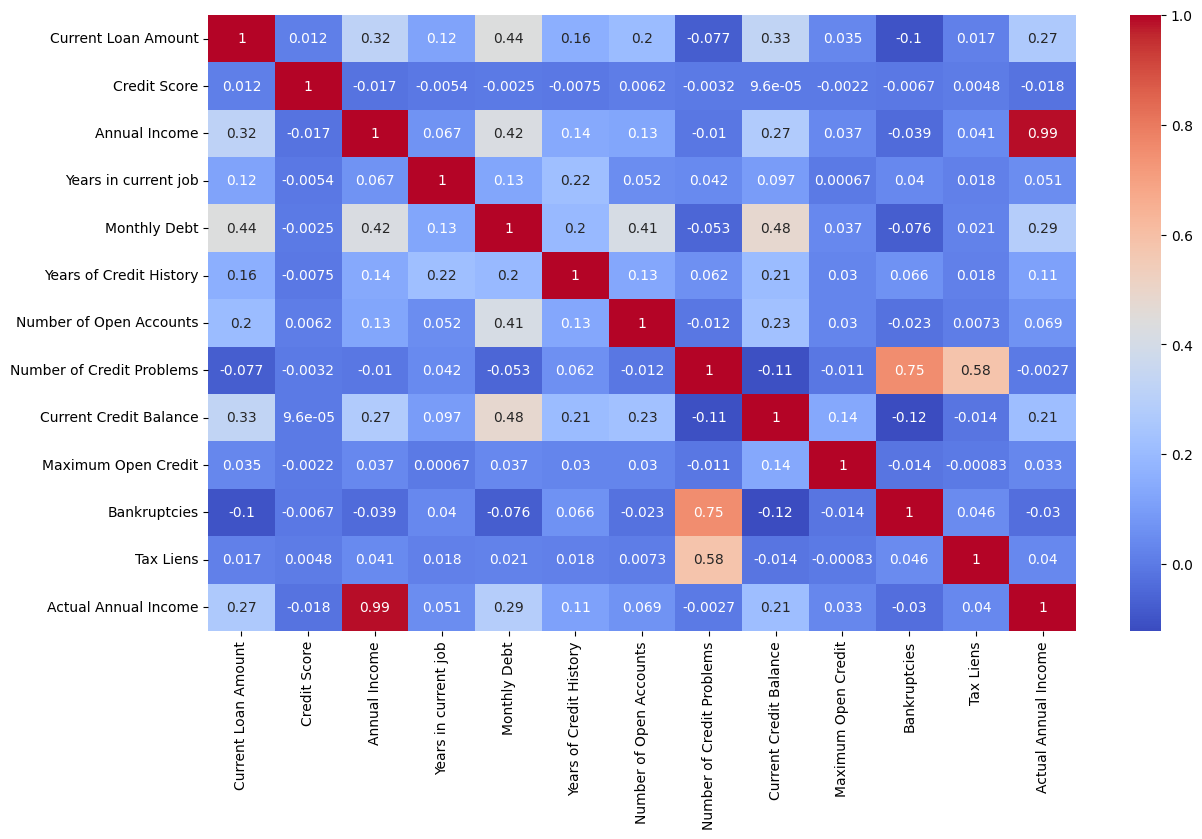

In [115]:
# produce code that shows which correlation statement is true
# Getting the correlation only numerical columns
correlation = df.corr(numeric_only=True)

# visualizing the correlation
plt.figure(figsize=(14,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
Between annual income and numbers of open accounts is weak positive correlation which means that people with high income are not very interested in opening many accounts.
But between credit problem and bankruptcies is strong positive correlation which means that people with credit problems (miss payments) are more probable to go bankrupt.

<h4><b>2. Download the purchases.csv from Moodle, and do the following observations:</b></h4>


In [116]:
df = pd.read_csv('Datasets/purchases.csv')

<li>What was the total price sum of the Purchase Order Number 018H2015? (14 rows in total)</li>

In [117]:
# produce the code that gets the needed total price sum
Total = df[df['Purchase Order Number'] == '018H2015']['Total Price']
Total.sum() 

np.float64(1245.0400000000002)

<li>What is the name and description of the purchased item with the Purchase Order Number 3176273?</li>

In [118]:
# produce the code that gets the needed name and description
df[df['Purchase Order Number'] == '3176273'][['Item Name', 'Item Description']]

,Item Name,Item Description
103,PC Desktop,HP Prodesk 600


<li>How many occasions (rows) of purchase data happened during the year 2013?</li>

In [119]:
# produce the code that filters the needed data for year 2013
# Since the Purchase Date format is object and so I need to convert it to datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')
df[df['Purchase Date'].dt.year == 2013].shape[0] 

34024

<ul><li>What are the 5 most common Departments in the data?</li>
<ul><li><b>Extra task: </b>What are 3 Departments using most money in the data?</li></ul>
</ul>

In [120]:
# produce the code that gtest the needed most common departments
df['Department Name'].value_counts().head(5)

Department Name
Corrections and Rehabilitation, Department of    10891
Correctional Health Care Services                 6593
Water Resources, Department of                    4582
Forestry and Fire Protection, Department of       4526
State Hospitals, Department of                    4281
Name: count, dtype: int64

In [121]:
# Extra Task: What are 3 Departments using most money in the data?
df.groupby('Department Name')['Total Price'].max().sort_values(ascending=False).head(3).map(int)

Department Name
Health Care Services, Department of    7337038064
Public Health, Department of           2200000000
Social Services, Department of          803754000
Name: Total Price, dtype: int64

<li>Sort the data by Department Name</li>

In [122]:
# sort the data by department name
sorted_data  = df.sort_values(by='Department Name')
sorted_data["Department Name"]

6              Administrative Law, Office of
519            Administrative Law, Office of
20018          Administrative Law, Office of
31381    African American Museum, California
27820    African American Museum, California
                        ...                 
24826         Water Resources, Department of
49068         Water Resources, Department of
49069         Water Resources, Department of
49057         Water Resources, Department of
44469         Water Resources, Department of
Name: Department Name, Length: 62657, dtype: object

In [123]:
df['Unit Price'] = df['Unit Price'].str.replace('$', '').astype(float)
df['Unit Price']

0            0.60
1        12587.05
2          199.00
3            4.95
4            1.00
           ...   
62652      100.50
62653      245.00
62654      245.00
62655    20475.00
62656     1181.44
Name: Unit Price, Length: 62657, dtype: float64

<ul>
<li><b>Small extra tasks for extra points</b></li>
<ul>
<li>How many purchases in the data were IT Goods and had the total price more than 50000 dollars?</li>
<li>How many of the purchases have anything to do with IT? (IT Goods, IT Services, IT Telecommunications)</li>

</ul>
</ul>

In [124]:
# produce the code for the extra tasks if you wish complete them
df[(df['Acquisition Type'] == 'IT Goods') & (df['Total Price'] > 50000)].shape[0]

698

In [125]:
# How many of the purchases have anything to do with IT? (IT Goods, IT Services, IT Telecommunications)
df[(df['Acquisition Type'] == 'IT Goods') | (df['Acquisition Type'] == 'IT Services') | (df['Acquisition Type'] == 'IT Telecommunications')].shape[0]

9558

<ul>
<li><b>Other extra tasks for extra points</b></li>
<ul>
<li>Create a new DataFrame, where you have filtered out purchases that have a Total Price of 0 or less</li>
<li>For this DataFrame, use groupby() –function twice to group the purchases data by Acquisition Type, and then calculating the result first by sum() and then by mean()</li>
<li>Which two acquisition types have the largest sums and means after grouping the data?</li>
</ul>
</ul>

In [126]:
# produce the code for the extra tasks if you wish complete them
Purchase_new = df[df['Total Price'] > 0]

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_2.png" />

<h4><b>3. Download the data_salaries_india.csv from Moodle, and consider the following questions of the data. Use any means in pandas (or even NumPy) you wish to explain your answers.</b></h4>


In [127]:
# loading the data
data = pd.read_csv('Datasets/data_salaries_india.csv')

<ul>
<li>Before we can do anything with the salaries, we have to convert them into something more usable</li>
<ul>
<li>Note: the salaries can be yearly, monthly or hourly salaries</li>
<ul>
<li>We don't also need the Indian rupee –sign (₹)</li>
</ul>
<li>You can use the template in Moodle to help you out with this (Salary filtering, pandas exercise 3)</li>
</ul>
</ul>

In [128]:
# converting the salaries as needed
def yearly_wage(row):
    # the last two characters determine if it's yearly, monthly, hourly
    period = row['Salary'][-2:]
    
    # remove all commas and combine all numbers
    number = int(''.join(filter(str.isdigit, row['Salary'])))
    
    # if it's hourly, the average work hours per year in India is
    # approximately 2117.01 (might change in future)
    if period == "hr":
        number = int(number * 2117.01)
    elif period == "mo":
        # months to year
        number = int(number * 12)
    
    # return the yearly salary in integer format
    return number


# I got "Yearly wage" function from Moodle to convert all.

data['Yearly Salary'] = data.apply(yearly_wage, axis=1)

# let's convert the "Year Salary" into "Month Salary" it is easier to understand
data['Monthly Salary'] = round( data['Yearly Salary'] / 12, 2)

# Now I can drop the the both columns  "Yearly Salary" and "Salary"
data = data.drop(['Yearly Salary', 'Salary'], axis=1)

<ul>
<li>What are the most common values in different fields (Job Titles, Companies, Location)? <b>Based on the distribution, is the data balanced or not?</b></li>
<ul>
<li><b>Extra task:</b> there seem to be some Job Titles that are almost the same, like "Machine Learning Data Associate" and "Machine Learning Associate", combine these into something common</li>
</ul>
</ul>

In [129]:
# produce the code that shows the most common values in different fields
# and answer the question about the distribution
data['Company Name'].value_counts().head()

Company Name
Tata Consultancy Services    51
Accenture                    39
Amazon                       35
Fresher                      31
First Student                30
Name: count, dtype: int64

In [130]:
data['Job Title'].value_counts().head()

Job Title
Data Scientist               2165
Data Analyst                 1167
Data Engineer                 948
Machine Learning Engineer     683
Data Science                   54
Name: count, dtype: int64

In [131]:
data['Location'].value_counts().head()

Location
Bangalore    1858
Pune          966
Hyderabad     786
New Delhi     781
Mumbai        736
Name: count, dtype: int64

In [153]:
# Combining "Machine Learning Engineer", "Senior Machine Learning Engineer", "Software Engineer - Machine Learning", "Machine Learning Developer", "Machine Learning Consultant", "Machine Learning Engineer/Data Scientist"
# "Machine Learning Associate Machine" "Learning Data Associate"  "Machine Learning Software Engineer", "Associate Machine Learning Engineer ", "Machine Learning Data Analyst", "Machine Learning Data Associate "

# Combining all the job titles that have 'Machine Learning' into one column
data['Job Title'] = data['Job Title'].apply(lambda x: "Machine Learning" if "Machine Learning" in x else x)
data['Job Title'].value_counts()

Job Title
Data Scientist              2165
Data Analyst                1167
Data Engineer                948
Machine Learning             712
Data Science                  54
Senior Data Scientist         45
Junior Data Scientist         22
Lead Data Scientist            6
Data Scientist - Trainee       2
Data Science Consultant        1
Data Science Manager           1
Data Science Lead              1
National Director              1
Data Science Associate         1
CEO                            1
Name: count, dtype: int64

## <span style="color: #20C997;">Personal Analysis</span>
The data is imbalanced 

<li>Are there any outliers in the data that might affect the averages negatively (certain salaries)? Manage the outliers as you best see fit (either remove them or leave them, based on your analysis) </li>

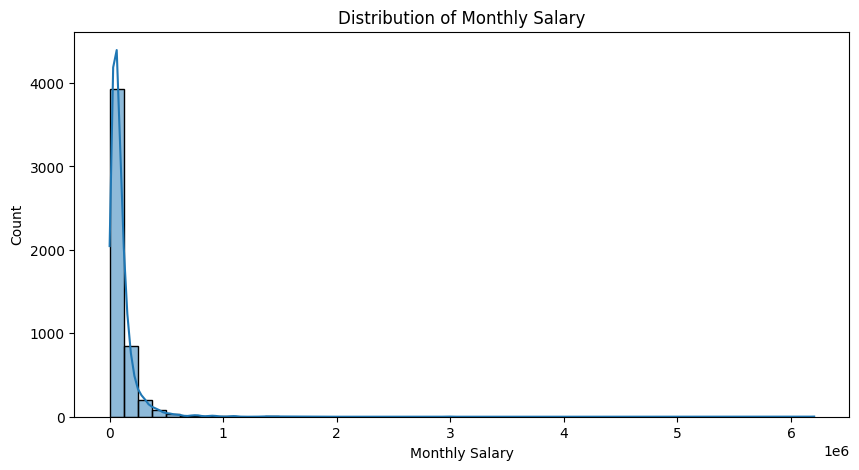

In [132]:
# produce the code that shows the potential outliers and take care of them as you see fit
# Visualizing the distribution of the data
plt.figure(figsize=(10, 5))
sns.histplot(data['Monthly Salary'], bins=50, kde=True)
plt.title("Distribution of Monthly Salary")
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
Before detecting the outliers of "Monthly Salary", the above visualization shows imbalanced distribution and the skewness is strong positive and the kurtosis is very high. it makes scenes because only few people have high income.

In [133]:
# Calculate statistics
mean = np.mean(data["Monthly Salary"])
median = np.median(data["Monthly Salary"])
std = np.std(data["Monthly Salary"])
min_val = np.min(data["Monthly Salary"])
max_val = np.max(data["Monthly Salary"])
percent = np.percentile(data["Monthly Salary"], [25, 50, 75])
skewness = stats.skew(data["Monthly Salary"])
kurtosis = stats.kurtosis(data["Monthly Salary"])


print("Mean Salary:", mean)
print("Median Salary:", median)
print("Minimum Salary:", min_val)
print("Maximum Salary:", max_val)
print("Standard Deviation of Salary:", std)
print("Salary Percentiles (25th, 50th, 75th):", percent)
print("Salary Skewness:", skewness)
print("Salary Kurtosis:", kurtosis)


Mean Salary: 102714.20449970741
Median Salary: 68664.25
Minimum Salary: 901.17
Maximum Salary: 6203777.25
Standard Deviation of Salary: 151359.55676261988
Salary Percentiles (25th, 50th, 75th): [ 38581.415  68664.25  119661.75 ]
Salary Skewness: 16.375426082180702
Salary Kurtosis: 552.1802966035519


## <span style="color: #20C997;">Personal Analysis</span>
As I mentioned on the above the "Monthly Salary" has un normal distribution, mean is higher than median which means mean is effected by some high income. 
Standard deviation is very spread.

In [141]:
Q1 = data["Monthly Salary"].quantile(0.25)
Q3 = data["Monthly Salary"].quantile(0.75)
IQR = Q3 - Q1


outliers_count = ((data["Monthly Salary"] < (Q1 - 1.5 * IQR)) | (data["Monthly Salary"] > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame({'Salary': ['Outliers'], 'Count': [outliers_count]})
outliers

,Salary,Count
0,Outliers,374


#### Trying different way to handle the outliers values and then let's see what would be the best way to deal with them

In [142]:
# Using distribution (z-score) method to find and remove outliers
z_scores = zscore(data["Monthly Salary"])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
z_scores_outlier = pd.DataFrame({'Salary': ['Outliers'], 'Count': [data.shape[0] - filtered_entries.sum()]})
z_scores_outlier

,Salary,Count
0,Outliers,59


## <span style="color: #20C997;">Personal Analysis</span>
Z-Score method is not  helpful to detect outliers" because my dataset is strongly skewed. since Z-Score measures how far data is from mean and standard Deviation unit but in this dataset mean and Standard deviation are effected by  outliers themselves. On other hand IQR is a mathematic technique to find the outliers and is independent from mean or Standard deviation. In my case IQR is the best option.

In [143]:
# Using cap method to deal with outliers
data['Monthly Salary'] = data['Monthly Salary'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)

# Calculate statistics
mean = np.mean(data["Monthly Salary"])
median = np.median(data["Monthly Salary"])
std = np.std(data["Monthly Salary"])
min_val = np.min(data["Monthly Salary"])
max_val = np.max(data["Monthly Salary"])
percent = np.percentile(data["Monthly Salary"], [25, 50, 75])
skewness = stats.skew(data["Monthly Salary"])
kurtosis = stats.kurtosis(data["Monthly Salary"])

print("Mean Salary:", mean)
print("Median Salary:", median)
print("Minimum Salary:", min_val)
print("Maximum Salary:", max_val)
print("Standard Deviation of Salary:", std)
print("Salary Percentiles (25th, 50th, 75th):", percent)
print("Salary Skewness:", skewness)
print("Salary Kurtosis:", kurtosis)

Mean Salary: 88093.85502925688
Median Salary: 68664.25
Minimum Salary: 901.17
Maximum Salary: 241282.2525
Standard Deviation of Salary: 65627.77942084288
Salary Percentiles (25th, 50th, 75th): [ 38581.415  68664.25  119661.75 ]
Salary Skewness: 1.0619714645384188
Salary Kurtosis: 0.17646971820428092


## <span style="color: #20C997;">Personal Analysis</span>
After using the "Capping" method to deal with outliers data, Now mean salary got closed to the median but still higher than median. Skewness and kurtosis now show near to normal distribution. 
The gap between min and max is smaller. Standard deviation is lower.

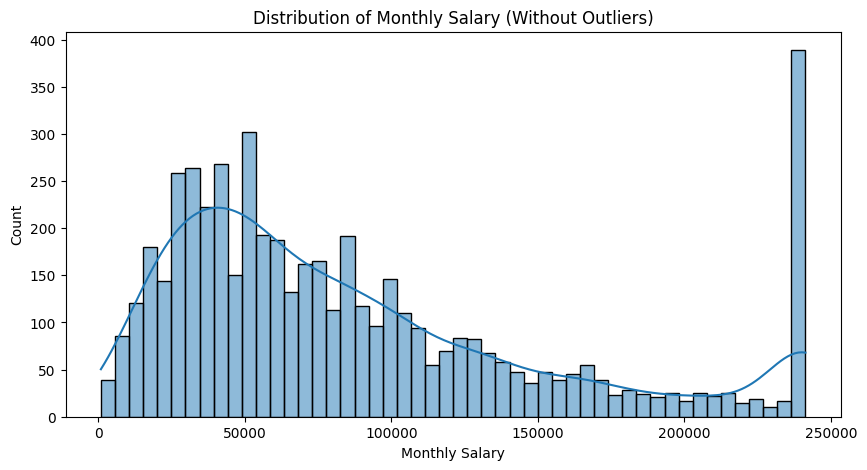

In [144]:
# Visualizing the distribution of "Monthly Salary" after removing outliers
plt.figure(figsize=(10, 5))
sns.histplot(data['Monthly Salary'], bins=50, kde=True)
plt.title("Distribution of Monthly Salary (Without Outliers)")
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
Even after handling outliers, still the data has skewed with long tail which means few people have higher income than others but it makes scence in real word
Now the distribution looks closer to normal

<ul>
<li>If we want to correlate upon categories (ordinal or binary), we need to use factorize(). <b>Factorize the Role-column, and add the new column to the DataFrame.</b></li>
<ul>
<li><b>Note:</b> using <b>factorize()</b> for nominal categories (Job Title, Location, Company Name) doesn't work well, because the numbers do not have any numeric magnitude. In other words, these categories don't measure anything, they just group data, so numerical comparison / correlation doesn't mean anything statistically.</li>
</ul>
</ul>

In [145]:
# converting the "Role" into numerical values
one_hot = pd.get_dummies(data['Role'], prefix='Role').astype(int)
data = pd.concat([data, one_hot], axis=1)
# drop the original "Role" column
data = data.drop('Role', axis=1)

## <span style="color: #20C997;">Personal Analysis</span>
I almost tried all options for encoding the categorical columns,but I have not seen any different so I go for dummy.

In [149]:
# Creating a dataframe for  Role_Manager,Role_Specialist, and monthly salary
role_data = data[['Role_Manager', 'Role_Specialist', 'Monthly Salary']]

<ul>
<li><b>Finally, check out the correlations. Does anything correlate with anything? Can we make any assumptions?</b></li>
<ul>
<li>Tip: When correlating against binary variables, sometimes the Spearman correlation might be more sensitive, in pandas:</li>
</ul>
</ul>

In [147]:
# finding the correlation between the column data_role
correlation = role_data.corr()
correlation

,Role_Manager,Role_Specialist,Monthly Salary
Role_Manager,1.000000,-1.000000,0.517336
Role_Specialist,-1.000000,1.000000,-0.517336
Monthly Salary,0.517336,-0.517336,1.000000


In [148]:
role_data.corr(method="spearman")

,Role_Manager,Role_Specialist,Monthly Salary
Role_Manager,1.00000,-1.00000,0.42936
Role_Specialist,-1.00000,1.00000,-0.42936
Monthly Salary,0.42936,-0.42936,1.00000


I used both way and found out that Pearson gives me stronger correlation because of data distribution, it is skewed. So I go for Spearman

## <span style="color: #20C997;">Personal Analysis</span>
Role_Manager and Role_Specialist has perfectly negative correlated, since they are binary.
Manager is correlated with salary positive, it shows that manager has better salary than Specialist which is correlated negative with salary

In [150]:
# Let's find average salary for Manager and Specialist
average_salary = role_data.groupby(['Role_Manager', 'Role_Specialist'])['Monthly Salary'].mean()
average_salary

Role_Manager  Role_Specialist
0             1                   73398.065032
1             0                  166531.952936
Name: Monthly Salary, dtype: float64

## <span style="color: #20C997;">Personal Analysis</span> 
It makes sense the manager has higher salary

In [151]:
# Grouping by title job and finding the average salary
average_salary = data.groupby('Job Title')['Monthly Salary'].mean()
average_salary

Job Title
Associate Machine Learning Engineer          38697.670000
CEO                                         241282.252500
Data Analyst                                 60979.376300
Data Engineer                                91828.484612
Data Science                                 38252.862824
Data Science Associate                      100326.080000
Data Science Consultant                     222622.000000
Data Science Lead                           241282.252500
Data Science Manager                        241282.252500
Data Scientist                              103755.386823
Data Scientist - Trainee                    111558.835000
Junior Data Scientist                        68731.117386
Lead Data Scientist                         154349.083333
Machine Learning Associate                   24592.830000
Machine Learning Consultant                  58866.750000
Machine Learning Data Analyst                30114.830000
Machine Learning Data Associate              22986.750000
Mach

In [152]:
# Grouping location, job title and finding the average salary
average_salary = data.groupby(['Location', 'Job Title'])['Monthly Salary'].mean()
average_salary

Location   Job Title                               
Bangalore  CEO                                         241282.252500
           Data Analyst                                 67714.472329
           Data Engineer                                96617.537115
           Data Scientist                              105523.169547
           Machine Learning Engineer                    81603.746181
           National Director                           241282.252500
Hyderabad  Associate Machine Learning Engineer          38697.670000
           Data Analyst                                 61301.282401
           Data Engineer                                86537.135622
           Data Scientist                               96749.636600
           Machine Learning Associate                   24592.830000
           Machine Learning Data Analyst                30114.830000
           Machine Learning Data Associate              22986.750000
           Machine Learning Data Associate I       

<b>Extra tasks for this dataset</b><br><br>

<ul>
<li>After all salaries have been converted to correct format by using the helper function (check Moodle), use quantiles and split the data into four different parts:</li>
<ul>
<li><span style="color: red;">Top 25%</span><br>=> quantile(0.75)</li>
<li><span style="color: red;">Above average, values between top 25-50%</span><br>
=> quantile(0.5)  - quantile(0.75)</li>
<li><span style="color: red;">Below average, values between top 50-75% </span><br>
=> quantile(0.25) – quantile(0.5)
</li>
<li><span style="color: red;">Bottom 25%</span><br>=> quantile(0.25)</li>
<br>
<li>What are the salary ranges for each quantile?</li><li>
See examples in pandas-materials on how to use quantiles
</li>
</ul>
</ul>
<hr>

<ul>
<li>Did you get any ideas how this data could be improved? Do we need some particular new data or some other operations on the data? Should we filter something out based on some other column?<br><br><b>Provide arguments for your answers in code comments.</b><br><br> </li>
<ul>
<li>Note: There are many good possible answers here!</li>
<li>Tip: How about replacing the "Salaries Reported" column with actual rows based on that number? Try doing this with the data!</li>
<li>Remember: This data only represents data engineering salaries based on selected Indian cities.
The world is a vast place :)
</li>
</ul>
</ul>

In [136]:
# code for the extra tasks


<h2><b>Advanced extra tasks for extra points (varying challenges, some require Googling):</b></h2>

<ul>
<li><b>1. Data merge is a useful tool when you have multiple files of data that have the exact same structure.</b><br><br>Download the two csv-files from Moodle (videogames1.csv, videogames2.csv), and combine them into one Data Frame. Lastly, save the Data Frame into a new csv-file => combined.csv.</li>
</ul>

In [137]:
# code for the advanced extra task

<ul>
<li><b>2. Functions and lambdas allow us to extend the operations we wish to do to columns and rows in pandas. </b><br><br>For example, the built-in functions may not be enough in all cases. Use the data of exercise 1 (loans.csv), and create a new column called "Income Group" that holds a text value. <br><br>Create either a function or a lambda, that determines the True or False –value based on the Annual Income –column. Use the following table to create the values:</li>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_3.png"/>

<li>After creating the function/lambda, you can use it by using pandas' .apply() –function.<br><br></li>

<li>Finally, get the amount of rows grouped by each of the new Income Group –field values and print them out.</li> 


In [138]:
# code for the advanced extra task

<ul>
<li><b>3.	Normalization allows us to convert the values of numeric columns to be between 0 and 1.</b> This is helpful when two different numbers seem to follow the same trend, but have completely different value ranges. For example, gold and silver prices tend to follow similar patterns, but their market worth is quite different. By using normalization, we can compare these trends more easily. <br>

Get historical prices of both gold and silver, and compare them without and with normalization. You can plot the prices by using df.plot() –function. Check the dataset in list in Moodle for some alternatives for gold and silver prices.
</li>
</ul>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_4.png" />

<ul>
<li><b>4.	Create an account to kaggle.com, and find any dataset that interests you. </b><br>

There's a list of possibly interesting datasets listed in Moodle as well.
<br><br>
<b>Try to find interesting features in data, in particular:</b>
</li>
<ul>
<li>Clean up data first (rows with too many NaN –values), values that are way too big or small, insignificant columns etc.)</li>
<li>You can create new columns as well if it seems suitable! (either by using functions or other means)</li>
<li>Interesting correlations (.corr() –function) and other interesting features in the data. Is something surprising in the data?</li>
<li><b>Note: </b>There are many ways on how to approach this exercise.</li>
</ul>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_5.png" />

In [139]:
# do any Kaggle.com -related extra tasks in their own Jupyter notebooks for easier coding